<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMBD0231ENSkillsNetwork866-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


## Metrics for Classification


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to evaluate a classification model using various metrics.</p>


## **Table of Contents**

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Examples">Examples</a>
        <ol>
            <li><a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe</a></li>
    <li><a href="#Task-2---Identify-the-target-column-and-the-data-columns">Task 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Task-3---Split-the-data-set">Task 3 - Split the data set</a></li>
    <li><a href="#Task-4---Build-and-train-a-classifier">Task 4 - Build and train a classifier</a></li>
    <li><a href="#Task-5---Evaluate-the-model">Task 5 - Evaluate the model</a></li>        </ol>
    </li>

<li><a href="#Exercises">Exercises</a></li>
<ol>
    <li><a href="#Exercise-1---Load-a-dataset">Exercise 1 - Load a dataset</a></li>
    <li><a href="#Exercise-2---Identify-the-target-column-and-the-data-columns">Exercise 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Exercise-3---Split-the-data">Exercise 3 - Split the data</a></li>
    <li><a href="#Exercise-4---Build-and-Train-a-new-classifier">Exercise 4 - Build and Train a new classifier</a></li>
    <li><a href="#Exercise-5---Evaluate-the-model">Exercise 5 - Evaluate the model</a></li>
    </ol>
</ol>


## Objectives

After completing this lab you will be able to:

- Use Pandas to load data sets.
- Identify the target and features.
- Use Logistic Regression to build a classifier.
- Use metrics to evaluate the model.
- Make predictions using a trained model.


## Datasets

In this lab you will be using dataset(s):

- Pima Indians Diabetes Database. Available at https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


## Setup


For this lab, we will be using the following libraries:

- [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
- [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
%pip install pandas
%pip install scikit-learn


The following required libraries are **not** pre-installed in the Skills Network Labs environment. **You will need to run the following cell** to install them:


In [ ]:
# None

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
# You can also use this section to suppress warnings generated by your code:
import warnings
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd


def warn(*args, **kwargs):
    pass


warnings.warn = warn
warnings.filterwarnings('ignore')


# import functions for train test split


# functions for metrics

## Task 1 - Load the data in a csv file into a dataframe


In [2]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diabetes.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

Let's look at some sample rows from the dataset we loaded:


In [3]:
# show 5 random rows from the dataset
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
602,1,124,74,36,0,27.8,0.100,30,0
215,12,151,70,40,271,41.8,0.742,38,1
293,1,128,48,45,194,40.5,0.613,24,1
483,0,84,82,31,125,38.2,0.233,23,0
126,3,120,70,30,135,42.9,0.452,30,0


Let's find out the number of rows and columns in the dataset:


In [4]:
df.shape

(768, 9)

Let's plot the types and count of Outcome


In [5]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

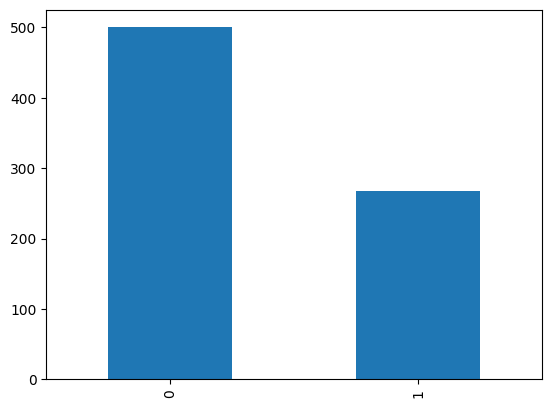

In [6]:
df.Outcome.value_counts().plot.bar()

There are 500 people without diabetes and 268 people with diabetes in this dataset.


## Task 2 - Identify the target column and the data columns


First we identify the target. Target is the value that our machine learning model needs to classify


In [7]:
y = df["Outcome"]

We identify the features next. Features are the input values our machine learning model learns from


In [8]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

## Task 3 - Split the data set


We split the data set in the ratio of 70:30. 70% training data, 30% testing data.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=40)

## Task 4 - Build and train a classifier


Create a Logistic Regression model


In [10]:
classifier = LogisticRegression()

Train/Fit the model on training data


In [11]:
classifier.fit(X_train, y_train)

LogisticRegression()

## Task 5 - Evaluate the model


Your model is now trained. Time to evaluate the model.


In [12]:
# Higher the score, better the model.
classifier.score(X_test, y_test)

0.7359307359307359

To compute the detailed metrics we need two values, the original mileage and the predicted mileage.


In [13]:
original_values = y_test
predicted_values = classifier.predict(X_test)

##### Precision


In [14]:
# Higher the value the better the model
precision_score(original_values, predicted_values)

0.7121212121212122

##### Recall


In [15]:
# Higher the value the better the model
recall_score(original_values, predicted_values)

0.5280898876404494

##### F1 Score


In [16]:
# Higher the value the better the model
f1_score(original_values, predicted_values)

0.6064516129032258

##### Confusion Matrix


In [17]:
# can be used to manually calculate various met
confusion_matrix(original_values, predicted_values)

array([[123,  19],
       [ 42,  47]])

# Exercises


In [18]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diabetes.csv"

### Exercise 1 - Load a dataset


Load the cancer dataset available at URL2


In [19]:
df2 = pd.read_csv(URL2)

In [20]:
df2.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
596,0,67,76,0,0,45.3,0.194,46,0
169,3,111,90,12,78,28.4,0.495,29,0
25,10,125,70,26,115,31.1,0.205,41,1
308,0,128,68,19,180,30.5,1.391,25,1
201,1,138,82,0,0,40.1,0.236,28,0


<details>
    <summary>Click here for a Hint</summary>
    
Use the read_csv function

</details>


<details>
    <summary>Click here for Solution</summary>

```python
df2 = pd.read_csv(URL2)
```

</details>


### Exercise 2 - Identify the target column and the data columns


- use the Outcome column as target
- use columns 'Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age' as features


In [21]:
y = df2["Outcome"]
X = df2[['Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age']]

<details>
    <summary>Click here for a Hint</summary>
    
Refer to Task 2
</details>


<details>
    <summary>Click here for Solution</summary>

```
y = df2["Outcome"]
X = df2[['Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age']]
```

</details>


### Exercise 3 - Split the data


Split the dataset into training and testing sets. Make 33% of the data as testing set. Use 40 as random state


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=40)

<details>
    <summary>Click here for a Hint</summary>
    
use the train_test_split function
</details>


<details>
    <summary>Click here for Solution</summary>

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

```

</details>


### Exercise 4 - Build and Train a new classifier


Create a new Classifier and train using the training data


In [23]:
classifier2 = LogisticRegression()
classifier2.fit(X_train, y_train)

LogisticRegression()

<details>
    <summary>Click here for a Hint</summary>
    
fit using the features and target
</details>


<details>
    <summary>Click here for Solution</summary>

```python
classifier2 = LogisticRegression()
classifier2.fit(X_train,y_train)

```

</details>


### Exercise 5 - Evaluate the model


In [24]:
original_values = y_test
predicted_values = classifier2.predict(X_test)

Print the metrics :

- Precision Score
- Recall Score
- F1 Score


In [25]:
precision_score(original_values, predicted_values)

0.75

In [26]:
recall_score(original_values, predicted_values)

0.48484848484848486

In [27]:
f1_score(original_values, predicted_values)

0.588957055214724

In [28]:
confusion_matrix(original_values, predicted_values)

array([[139,  16],
       [ 51,  48]])

<details>
    <summary>Click here for a Hint</summary>
    
use the metrics functions
</details>


<details>
    <summary>Click here for Solution</summary>

```
print(precision_score(original_values, predicted_values))
print(recall_score(original_values, predicted_values))
print(f1_score(original_values, predicted_values))
```

</details>


Congratulations you have completed this lab.<br>


## Authors


[Ramesh Sannareddy](https://www.linkedin.com/in/rsannareddy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMBD0231ENSkillsNetwork866-2023-01-01)


### Other Contributors


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description      |
| ----------------- | ------- | ----------------- | ----------------------- |
| 2023-04-15        | 0.1     | Ramesh Sannareddy | Initial Version Created |


Copyright © 2023 IBM Corporation. All rights reserved.
